Before beginning this exercise you must download some data files, which can be retrieved from here: 

https://northwestern.box.com/s/rsb5wjb7dztg2128flzgex4fmq19havu

Be sure to move the corresponding files to the directory where you are running this notebook. Furthermore, you will need to provide the path to these data as the variable `dataDir`, below.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from rhlUtils import BBox, CCD, Image, imshow

%matplotlib notebook 
%config InlineBackend.figure_format = 'retina'

#%matplotlib qt
#%gui qt

dataDir = "/Users/alcorn/Github/LSSTC-DSFP-Sessions/Session5/Day1/"

I've provided you with two datasets ("bias.npz" and "bias2.npz") which are the trimmed image of a CCD from the PFS project.  One has had a bias frame subtracted, one has not.

You can read the data into an Image, and the Image object is also able to return a view of the data from a single
amplifier (in the range 0..7).  For example, you can say:

<IPython.core.display.Javascript object>


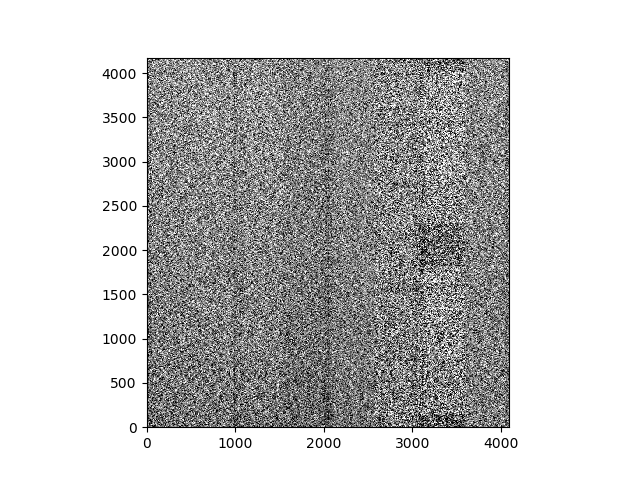

In [3]:
bias = Image(os.path.join(dataDir, "bias.npz"))

for amp in bias.amps:
    aim = bias.getAmpImage(amp)
    aim/=np.median(aim)

plt.clf()
imshow(bias.image)     # or you can use plt.imshow if you'd prefer;  imshow is imported from rhlUtils
plt.show();

Take a look at the entire image.  Hint:  each amplifier has its own gain

Which do you think had a bias frame subtracted?  Why?

<IPython.core.display.Javascript object>


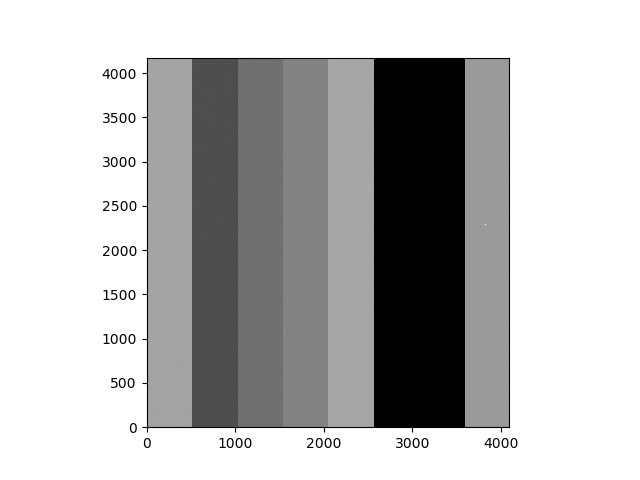

In [6]:
bias = Image(os.path.join(dataDir, "bias.npz"))

plt.clf()
imshow(bias.image)
plt.show();

Write a program to measure the power spectrum of each amplifier separately (but plot them all together).

Each row of the data corresponds to a row of the CCD clocked onto the serial register -- but remember that we have trimmed the data to throw away the extended register and overclock.  The CCD object has the magic numbers you need to correct for this:
-    rawWidth = 552                      # number of pixels digitised per parallel transfer
-    tau_s = 13.92e-6                    # Time for one serial transfer (s)
-    tau_p = 222.72e-6                   # Time for one parallel transfer (s)

There is also some junk in the data (e.g. cosmic rays, transients at the bottom of the chip) that might affect your results -- a simple n-sigma clip might help.

If you've never calculated a power spectrum before you might need some help.  There is code in scipy.signal to do it, but it's a little tricky.  The power spectrum should be essentially flat (but not exactly flat).

Which amplifier has the worst low-frequency behaviour?  Was that what you expected?

<IPython.core.display.Javascript object>


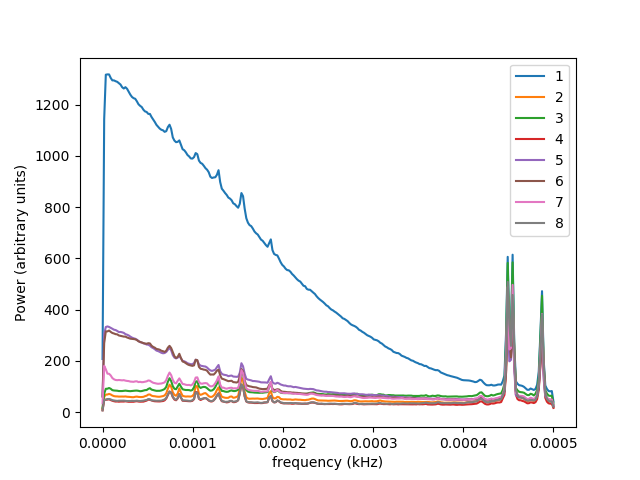

In [14]:
import scipy.signal

bias = Image(os.path.join(dataDir, "bias.npz"))

plt.figure(1)
plt.clf()

rawWidth = 552
tau_s = 13.92e-6
tau_p = 222.72e-6
ampNo=1
for amp in bias.amps:
    dat = bias.getAmpImage(amp)
    median=np.nanmedian(dat)
    sigma=np.nanstd(dat)
    flatdat=np.ndarray.flatten(dat)
    f, PS=scipy.signal.welch(flatdat, fs=1.0, nperseg=rawWidth)
    
    plt.plot(1e-3*f, PS, label=str(ampNo))
    #print(len(f),f)
    #print(len(PS),PS)
    ampNo+=1
    
plt.xlabel("frequency (kHz)")
plt.ylabel("Power (arbitrary units)")
plt.legend(loc='best')
plt.show();